In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
%matplotlib inline
df_bloodLvls = pd.read_csv("BloodLevels.csv")

In [ ]:
df_bloodLvls.describe()

,geo_area_id,borough_id,time_period,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number Tested,Children under 6 years with elevated blood lead levels (BLL) Number Tested _NOTES,"Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested"
count,576.000000,564.000000,576.000000,576.000000,576.000000,576.000000,576.000000,0.0,576.000000,576.000000,576.000000
mean,252.708333,2.851064,2010.500000,1016.967014,99.234375,34.130208,20071.180556,NaN,46.913542,4.418403,1.484549
std,149.094653,1.255531,3.455053,3127.307541,274.841442,93.393634,48789.333503,NaN,38.924295,3.128868,1.072739
min,1.000000,1.000000,2005.000000,5.000000,0.000000,0.000000,800.000000,NaN,3.100000,0.000000,0.000000
25%,106.750000,2.000000,2007.750000,109.500000,12.000000,4.000000,4600.000000,NaN,17.675000,2.300000,0.700000
50%,256.000000,3.000000,2010.500000,267.000000,31.000000,11.000000,7500.000000,NaN,32.450000,3.600000,1.300000
75%,402.250000,4.000000,2013.250000,700.250000,68.000000,23.250000,12200.000000,NaN,65.250000,5.600000,1.900000
max,504.000000,5.000000,2016.000000,37344.000000,3082.000000,1014.000000,342900.000000,NaN,182.800000,19.900000,6.000000


In [ ]:
df_bloodLvls.head(25)

,geo_type,geo_area_id,geo_area_name,borough_id,time_period,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL,Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL _NOTES,Children under 6 years with elevated blood lead levels (BLL) Number Tested,Children under 6 years with elevated blood lead levels (BLL) Number Tested _NOTES,"Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=5 µg/dL per 1,000 tested_NOTES","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=10 µg/dL per 1,000 tested_NOTES","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested","Children under 6 years with elevated blood lead levels (BLL) Rate BLL>=15 µg/dL per 1,000 tested_NOTES"
0,Borough,1,Bronx,1.0,2005,8245,NaN,595,NaN,167,NaN,64500,NaN,127.7,NaN,9.2,NaN,2.6,NaN
1,Borough,1,Bronx,1.0,2006,7272,NaN,474,NaN,144,NaN,67200,NaN,108.2,NaN,7.1,NaN,2.1,NaN
2,Borough,1,Bronx,1.0,2007,6174,NaN,438,NaN,135,NaN,68300,NaN,90.4,NaN,6.4,NaN,2.0,NaN
3,Borough,1,Bronx,1.0,2008,4254,NaN,292,NaN,105,NaN,69800,NaN,60.9,NaN,4.2,NaN,1.5,NaN
4,Borough,1,Bronx,1.0,2009,2742,NaN,278,NaN,103,NaN,70000,NaN,39.2,NaN,4.0,NaN,1.5,NaN
5,Borough,1,Bronx,1.0,2010,2625,NaN,290,NaN,101,NaN,70100,NaN,37.5,NaN,4.1,NaN,1.4,NaN
6,Borough,1,Bronx,1.0,2011,1996,NaN,231,NaN,75,NaN,70100,NaN,28.5,NaN,3.3,NaN,1.1,NaN
7,Borough,1,Bronx,1.0,2012,1396,NaN,184,NaN,81,NaN,66800,NaN,20.9,NaN,2.8,NaN,1.2,NaN
8,Borough,1,Bronx,1.0,2013,1312,NaN,193,NaN,74,NaN,65300,NaN,20.1,NaN,3.0,NaN,1.1,NaN
9,Borough,1,Bronx,1.0,2014,1186,NaN,177,NaN,68,NaN,63400,NaN,18.7,NaN,2.8,NaN,1.1,NaN


In [ ]:
unique_cities = list(set(df_bloodLvls["geo_area_name"]))
forbidden_cities = ["Bronx", "Brooklyn", "New York City", "Queens", "Staten Island"]
unique_cities
for j in unique_cities:
    if j in forbidden_cities:
        unique_cities.remove(j)
    else:
        continue
print(unique_cities)

['Bensonhurst - Bay Ridge', 'Crotona -Tremont', 'Long Island City - Astoria', 'Kingsbridge - Riverdale', 'Canarsie - Flatlands', 'South Beach - Tottenville', 'Jamaica', 'Southeast Queens', 'Fresh Meadows', 'Gramercy Park - Murray Hill', 'Williamsburg - Bushwick', 'Northeast Bronx', 'West Queens', 'East Harlem', 'Hunts Point - Mott Haven', 'Upper West Side', 'Coney Island - Sheepshead Bay', 'Chelsea - Clinton', 'Rockaways', 'Pelham - Throgs Neck', 'Stapleton - St. George', 'East New York', 'Union Square - Lower East Side', 'Southwest Queens', 'Central Harlem - Morningside Heights', 'Downtown - Heights - Slope', 'Bedford Stuyvesant - Crown Heights', 'East Flatbush - Flatbush', 'Willowbrook', 'Ridgewood - Forest Hills', 'Manhattan', 'Greenwich Village - SoHo', 'Lower Manhattan', 'Upper East Side', 'Port Richmond', 'Washington Heights', 'Bayside - Little Neck', 'New York City', 'Sunset Park', 'High Bridge - Morrisania', 'Flushing - Clearview', 'Greenpoint', 'Fordham - Bronx Pk', 'Borough P

In [ ]:
averages_List = []
new_avgs = []
def avgs(loc):
    total = 0
    curNum = -1
    countList = []
    for i in df_bloodLvls["geo_area_name"]:
        curNum += 1
        if df_bloodLvls["geo_area_name"][curNum] == loc:
            total += df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum]
            countList.append(df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum])
        else:
            continue
    averages_List.append(total/12)
    new_avgs.append(total/12)
    return total/12, countList
        
    

In [ ]:
for x in unique_cities:
    print(x, avgs(x))
    


Bensonhurst - Bay Ridge (13.583333333333334, [16, 13, 21, 19, 12, 17, 10, 11, 12, 9, 11, 12])
Crotona -Tremont (16.916666666666668, [22, 20, 19, 12, 37, 15, 10, 11, 14, 18, 4, 21])
Long Island City - Astoria (12.5, [5, 7, 19, 36, 6, 12, 11, 9, 7, 4, 30, 4])
Kingsbridge - Riverdale (2.6666666666666665, [1, 1, 4, 4, 2, 0, 1, 2, 7, 3, 3, 4])
Canarsie - Flatlands (6.0, [15, 2, 3, 9, 6, 2, 5, 17, 3, 2, 2, 6])
South Beach - Tottenville (1.9166666666666667, [2, 2, 1, 1, 3, 2, 4, 0, 3, 2, 0, 3])
Jamaica (26.0, [37, 17, 49, 40, 21, 13, 30, 25, 19, 22, 15, 24])
Southeast Queens (8.333333333333334, [12, 9, 9, 7, 4, 6, 8, 5, 13, 17, 4, 6])
Fresh Meadows (3.5833333333333335, [4, 7, 4, 2, 4, 1, 1, 5, 6, 3, 1, 5])
Gramercy Park - Murray Hill (1.0, [1, 1, 4, 0, 0, 0, 1, 2, 2, 1, 0, 0])
Williamsburg - Bushwick (28.916666666666668, [12, 27, 41, 17, 70, 30, 21, 15, 32, 47, 15, 20])
Northeast Bronx (12.75, [14, 9, 12, 12, 8, 14, 17, 19, 19, 12, 6, 11])
West Queens (45.916666666666664, [42, 17, 40, 67, 44,

In [ ]:
for p in new_avgs:
    if p == 546.0833333333334:
        new_avgs.remove(p)
        
print(new_avgs)

[13.583333333333334, 16.916666666666668, 12.5, 2.6666666666666665, 6.0, 1.9166666666666667, 26.0, 8.333333333333334, 3.5833333333333335, 1.0, 28.916666666666668, 12.75, 45.916666666666664, 5.333333333333333, 9.416666666666666, 3.8333333333333335, 21.25, 1.9166666666666667, 6.333333333333333, 14.25, 8.583333333333334, 21.916666666666668, 4.25, 24.416666666666668, 7.833333333333333, 11.75, 34.333333333333336, 29.083333333333332, 1.25, 11.416666666666666, 44.666666666666664, 1.1666666666666667, 0.9166666666666666, 2.1666666666666665, 7.25, 16.25, 0.75, 12.416666666666666, 16.916666666666668, 8.333333333333334, 15.166666666666666, 25.833333333333332, 41.666666666666664]


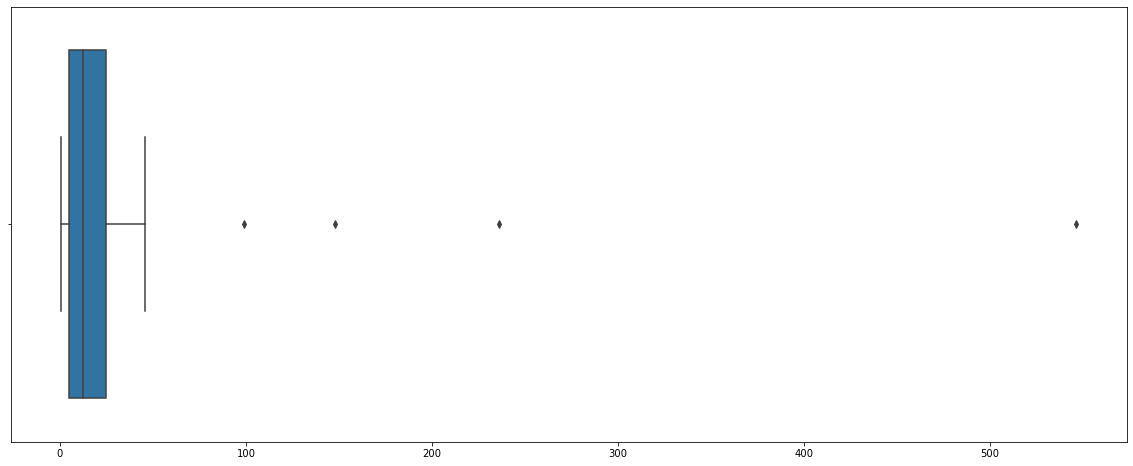

In [ ]:
list_05 = []
list_06 = []
list_07 = []
list_08 = []
list_09 = []
list_10 = []
list_11 = []
list_12 = []
list_13 = []
list_14 = []
list_15 = []
list_16 = []
def points(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                list_09.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16.append(df_bloodLvls[column][curNum])

                
list_05_10 = []
list_06_10 = []
list_07_10 = []
list_08_10 = []
list_09_10 = []
list_10_10 = []
list_11_10 = []
list_12_10 = []
list_13_10 = []
list_14_10 = []
list_15_10 = []
list_16_10 = []
def points2(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_09_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15_10.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16_10.append(df_bloodLvls[column][curNum])
                
list_05_100 = []
list_06_100 = []
list_07_100 = []
list_08_100 = []
list_09_100 = []
list_10_100 = []
list_11_100 = []
list_12_100 = []
list_13_100 = []
list_14_100 = []
list_15_100 = []
list_16_100 = []
def points3(column):
    curNum = -1
    for i in df_bloodLvls["time_period"]:
        curNum += 1
        if df_bloodLvls["time_period"][curNum] == 2005 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_05_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2006 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_06_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2007 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_07_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2008 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_08_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2009 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_09_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2010 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_10_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2011 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_11_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2012 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_12_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2013 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_13_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2014 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_14_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2015 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_15_100.append(df_bloodLvls[column][curNum])
        if df_bloodLvls["time_period"][curNum] == 2016 and df_bloodLvls["geo_area_name"][curNum] not in forbidden_cities:
                  list_16_100.append(df_bloodLvls[column][curNum])

In [ ]:
points("Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL")
avg_05 = np.mean(list_05)
avg_06 = np.mean(list_06)
avg_07 = np.mean(list_07)
avg_08 = np.mean(list_08)
avg_09 = np.mean(list_09)
avg_10 = np.mean(list_10)
avg_11 = np.mean(list_11)
avg_12 = np.mean(list_12)
avg_13 = np.mean(list_13)
avg_14 = np.mean(list_14)
avg_15 = np.mean(list_15)
avg_16 = np.mean(list_16)

timeSeries = [avg_05, avg_06, avg_07, avg_08, avg_09, avg_10, avg_11, avg_12, avg_13, avg_14, avg_15, avg_16]
years = [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

points2("Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL")
avg_05_10 = np.mean(list_05_10)
avg_06_10 = np.mean(list_06_10)
avg_07_10 = np.mean(list_07_10)
avg_08_10 = np.mean(list_08_10)
avg_09_10 = np.mean(list_09_10)
avg_10_10 = np.mean(list_10_10)
avg_11_10 = np.mean(list_11_10)
avg_12_10 = np.mean(list_12_10)
avg_13_10 = np.mean(list_13_10)
avg_14_10 = np.mean(list_14_10)
avg_15_10 = np.mean(list_15_10)
avg_16_10 = np.mean(list_16_10)

timeSeries_10 = [avg_05_10, avg_06_10, avg_07_10, avg_08_10, avg_09_10, avg_10_10, avg_11_10, avg_12_10, avg_13_10, avg_14_10, avg_15_10, avg_16_10]

points3("Children under 6 years with elevated blood lead levels (BLL) Number BLL>=10 µg/dL")
avg_05_100 = np.mean(list_05_100)
avg_06_100 = np.mean(list_06_100)
avg_07_100 = np.mean(list_07_100)
avg_08_100 = np.mean(list_08_100)
avg_09_100 = np.mean(list_09_100)
avg_10_100 = np.mean(list_10_100)
avg_11_100 = np.mean(list_11_100)
avg_12_100 = np.mean(list_12_100)
avg_13_100 = np.mean(list_13_100)
avg_14_100 = np.mean(list_14_100)
avg_15_100 = np.mean(list_15_100)
avg_16_100 = np.mean(list_16_100)

timeSeries_100 = [avg_05_100, avg_06_100, avg_07_100, avg_08_100, avg_09_100, avg_10_100, avg_11_100, avg_12_100, avg_13_100, avg_14_100, avg_15_100, avg_16_100]










data = {
    
    'BLL>=15':[avg_05, avg_06, avg_07, avg_08, avg_09, avg_10, avg_11, avg_12, avg_13, avg_14, avg_15, avg_16], 
    'BLL>=5':[avg_05_10, avg_06_10, avg_07_10, avg_08_10, avg_09_10, avg_10_10, avg_11_10, avg_12_10, avg_13_10, avg_14_10, avg_15_10, avg_16_10],
    'BLL>=10':[avg_05_100, avg_06_100, avg_07_100, avg_08_100, avg_09_100, avg_10_100, avg_11_100, avg_12_100, avg_13_100, avg_14_100, avg_15_100, avg_16_100],
    'years':[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]



} 

df_timeSeries = pd.DataFrame(data)


In [ ]:
df_timeSeries.head(25)

,BLL>=15,BLL>=5,BLL>=10,years
0,25.558140,974.255814,79.162791,2005
1,23.720930,903.674419,70.465116,2006
2,18.534884,793.325581,57.697674,2007
3,15.511628,527.813953,46.325581,2008
4,14.046512,389.069767,39.395349,2009
5,14.209302,351.627907,39.697674,2010
6,11.511628,288.023256,33.534884,2011
7,9.860465,204.837209,26.325581,2012
8,8.186047,181.558140,22.744186,2013
9,8.395349,164.372093,23.883721,2014


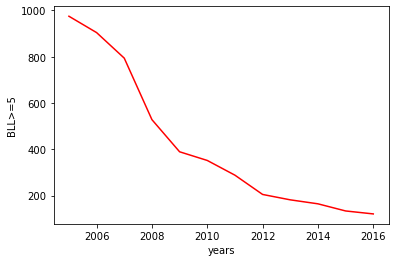

In [ ]:
sns.lineplot(x="years", y="BLL>=5", color="red", data=df_timeSeries)

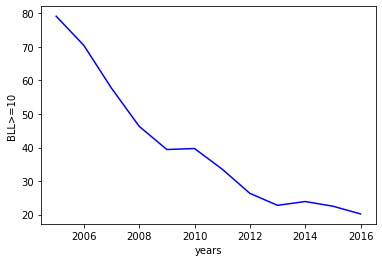

In [ ]:
sns.lineplot(x="years", y="BLL>=10", color="blue", data=df_timeSeries)

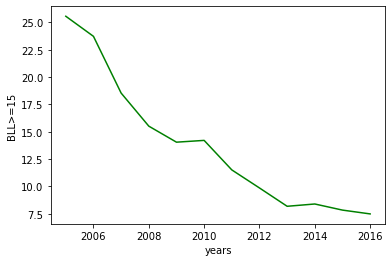

In [ ]:
sns.lineplot(x="years", y="BLL>=15", color="green", data=df_timeSeries)

[13.583333333333334, 16.916666666666668, 12.5, 2.6666666666666665, 6.0, 1.9166666666666667, 26.0, 8.333333333333334, 3.5833333333333335, 1.0, 28.916666666666668, 12.75, 45.916666666666664, 5.333333333333333, 9.416666666666666, 3.8333333333333335, 21.25, 1.9166666666666667, 6.333333333333333, 14.25, 8.583333333333334, 21.916666666666668, 4.25, 24.416666666666668, 7.833333333333333, 11.75, 34.333333333333336, 29.083333333333332, 1.25, 11.416666666666666, 44.666666666666664, 1.1666666666666667, 0.9166666666666666, 2.1666666666666665, 7.25, 16.25, 0.75, 546.0833333333334, 12.416666666666666, 16.916666666666668, 8.333333333333334, 15.166666666666666, 25.833333333333332, 41.666666666666664]


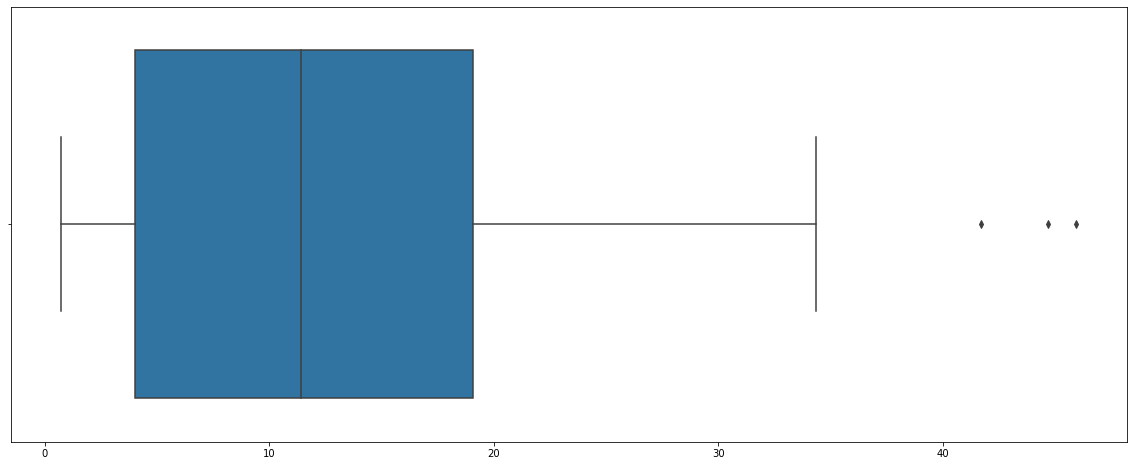

In [ ]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.boxplot(x=new_avgs)
print(averages_List)

In [ ]:
# Normalizing Distribution
# pre_avgs = []
# def normalize(loc):
#     total = 0
#     curNum = -1
#     countList = []
#     for i in df_bloodLvls["geo_area_name"]:
#         curNum += 1
#         if df_bloodLvls["geo_area_name"][curNum] == loc:
#             total += df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum]
#             countList.append(df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number BLL>=15 µg/dL"][curNum])
#         else:
#             continue
#     averages_List.append(total/12)
#     return total, countList

pre_avgs = []
def normalize(location, column):
    curNum = -1
    countList = []
    total = 0
    for city in df_bloodLvls["geo_area_name"]:
        curNum += 1
        if location == city:
            num = df_bloodLvls[column][curNum]/df_bloodLvls["Children under 6 years with elevated blood lead levels (BLL) Number Tested"][curNum]
            total += num
            countList.append(str(num) + " " + str(df_bloodLvls["time_period"][curNum]))
        else:
            continue
    pre_avgs.append(total/12)
    return total/12, countList
    
        

In [ ]:
for x in unique_cities:
    print(x, normalize(x, "Children under 6 years with elevated blood lead levels (BLL) Number BLL >=5 µg/dL"))
    

Bensonhurst - Bay Ridge (0.04281228405989632, ['0.05109375 2008', '0.017236842105263158 2016', '0.0847457627118644 2005', '0.04257575757575757 2009', '0.08548387096774193 2006', '0.04 2010', '0.0236231884057971 2012', '0.02287671232876712 2014', '0.07048387096774193 2007', '0.022837837837837837 2013', '0.033943661971830984 2011', '0.018846153846153846 2015'])
Crotona -Tremont (0.04940533210902779, ['0.09033057851239669 2007', '0.04016528925619835 2009', '0.11235294117647059 2006', '0.017522935779816513 2014', '0.13575221238938054 2005', '0.02280701754385965 2012', '0.015092592592592593 2015', '0.0365546218487395 2010', '0.013300970873786408 2016', '0.01892857142857143 2013', '0.028403361344537813 2011', '0.061652892561983474 2008'])
Long Island City - Astoria (0.04627197047432429, ['0.02014705882352941 2013', '0.023478260869565216 2012', '0.08971428571428572 2007', '0.09728571428571428 2006', '0.016911764705882352 2015', '0.04217391304347826 2009', '0.027 2011', '0.04028985507246377 20

In [ ]:
post_avgs = [num*100 for num in pre_avgs]
pre_avgs

data_perc = {'percentage':[0.04281228405989632,
 0.04940533210902779,
 0.04627197047432429,
 0.03056250322882549,
 0.0411019923647798,
 0.01576363391479021,
 0.04620347707715849,
 0.04234444855628685,
 0.029892926263853356,
 0.033445533024480396,
 0.07039073628676763,
 0.04638345634548972,
 0.04923491723974644,
 0.054181035266727205,
 0.047569084409144896,
 0.03300647999212133,
 0.05507983887378625,
 0.04058442861461437,
 0.039942472508327,
 0.04545726297128822,
 0.04303576981006101,
 0.06186094502207349,
 0.04854544053143173,
 0.04854298336130061,
 0.052680896880556355,
 0.05437447315931693,
 0.06756752457933472,
 0.06730336570252518,
 0.0195704988851728,
 0.04210489181076113,
 0.04205963624046144,
 0.05845717068878834,
 0.03524815115440116,
 0.022583257107534224,
 0.0512582517681402,
 0.04115177487791311,
 0.021647527910685808,
 0.05254493817355322,
 0.05227048809857823,
 0.030392793931916757,
 0.10856332753520498,
 0.05325962943357401,
 0.07705142348711261]}
df_perc = pd.DataFrame(data)

In [ ]:
pre_avgs

[0.04281228405989632,
 0.04940533210902779,
 0.04627197047432429,
 0.03056250322882549,
 0.0411019923647798,
 0.01576363391479021,
 0.04620347707715849,
 0.04234444855628685,
 0.029892926263853356,
 0.033445533024480396,
 0.07039073628676763,
 0.04638345634548972,
 0.04923491723974644,
 0.054181035266727205,
 0.047569084409144896,
 0.03300647999212133,
 0.05507983887378625,
 0.04058442861461437,
 0.039942472508327,
 0.04545726297128822,
 0.04303576981006101,
 0.06186094502207349,
 0.04854544053143173,
 0.04854298336130061,
 0.052680896880556355,
 0.05437447315931693,
 0.06756752457933472,
 0.06730336570252518,
 0.0195704988851728,
 0.04210489181076113,
 0.04205963624046144,
 0.05845717068878834,
 0.03524815115440116,
 0.022583257107534224,
 0.0512582517681402,
 0.04115177487791311,
 0.021647527910685808,
 0.05254493817355322,
 0.05227048809857823,
 0.030392793931916757,
 0.10856332753520498,
 0.05325962943357401,
 0.07705142348711261]

In [ ]:
fig_dims = (20, 8)
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.distplot(df_perc, rug=False, rug_kws={"color": "g"}, kde_kws={"color": "k", "lw": 3, "label": "KDE"}, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1, "color": "g"})

NameError: name 'sns' is not defined

In [ ]:

unique_cities
df_cities = pd.DataFrame()
df_cities["Neighborhood"] = unique_cities
df_cities.to_excel('result.xlsx', index = False) 


In [ ]:
df_povertyRate = pd.read_excel("daby.xlsx")
df_povertyRate

,Neighborhood,% With Lead Risk,Poverty Rate,Median Income,Average Income,Borough,Unnamed: 6,Unnamed: 7
0,Bensonhurst - Bay Ridge,0.017237,20.000,55360.0,74157.00,Brooklyn,NaN,NaN
1,Crotona -Tremont,0.013301,37.700,26910.0,NaN,Bronx,NaN,NaN
2,Long Island City - Astoria,0.014000,17.000,65392.0,97379.00,Queens,NaN,NaN
3,Kingsbridge - Riverdale,0.009200,0.278,58551.0,83674.00,Bronx,NaN,NaN
4,Canarsie - Flatlands,0.012754,0.096,67669.0,83059.00,Brooklyn,NaN,NaN
5,South Beach - Tottenville,0.007568,9.300,80361.0,90629.89,Staten Island,NaN,reason for outier is significant water quality...
6,Jamaica,0.017023,13.100,48559.0,76362.00,Queens,NaN,NaN
7,Southeast Queens,0.013103,13.000,72290.0,67190.00,Queens,NaN,NaN
8,Fresh Meadows,0.007632,13.000,66483.0,80815.00,Queens,NaN,NaN
9,Gramercy Park - Murray Hill,0.003333,11.000,115027.0,189311.94,Manhattan,NaN,NaN


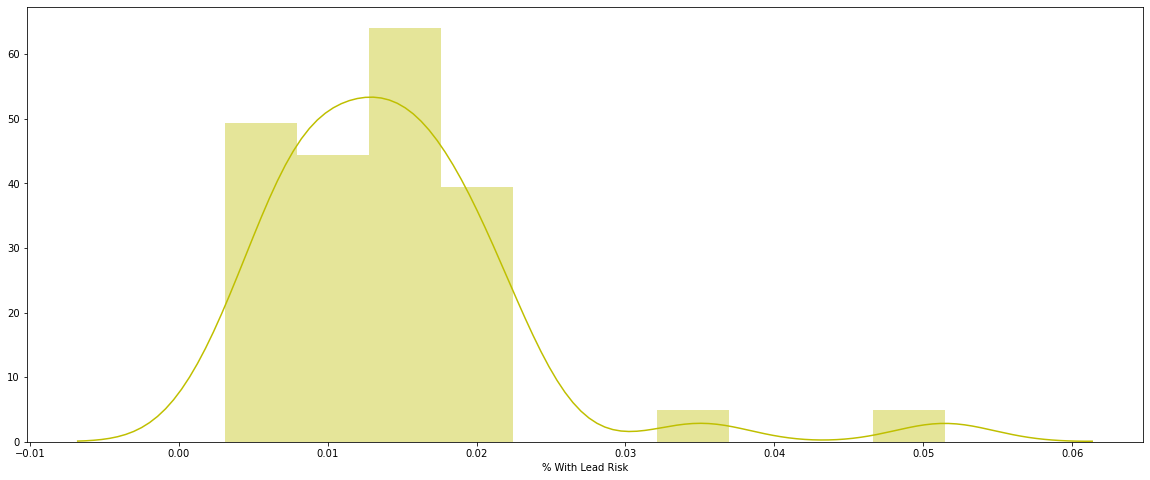

In [ ]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.distplot(df_povertyRate["% With Lead Risk"], color="y")

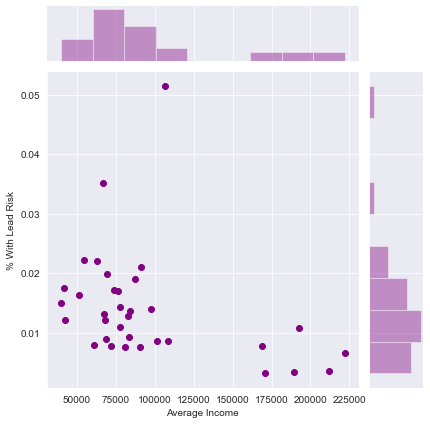

In [ ]:
sns.jointplot(x='Average Income',y='% With Lead Risk',data=df_povertyRate,color='purple')

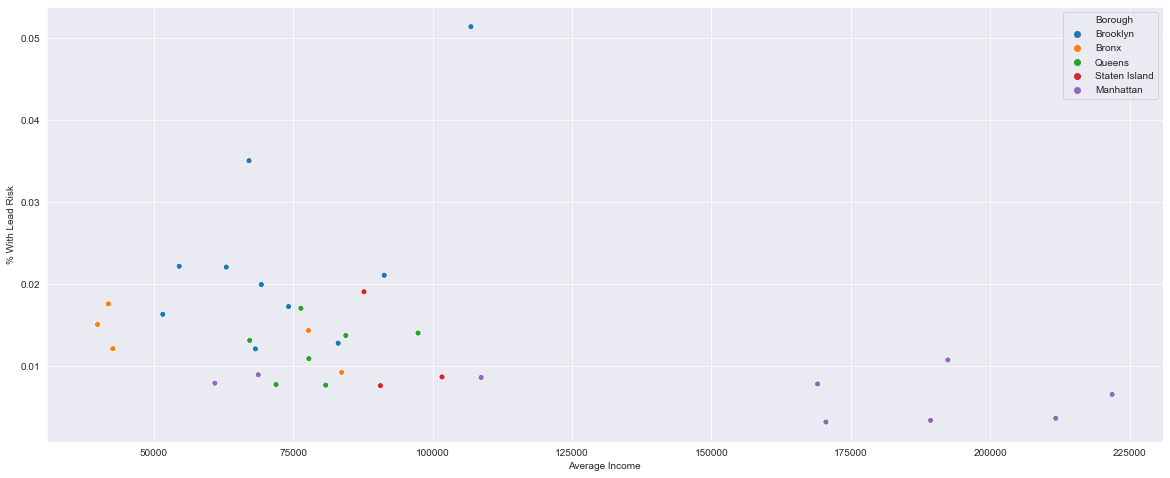

In [ ]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Average Income", y="% With Lead Risk", hue="Borough")

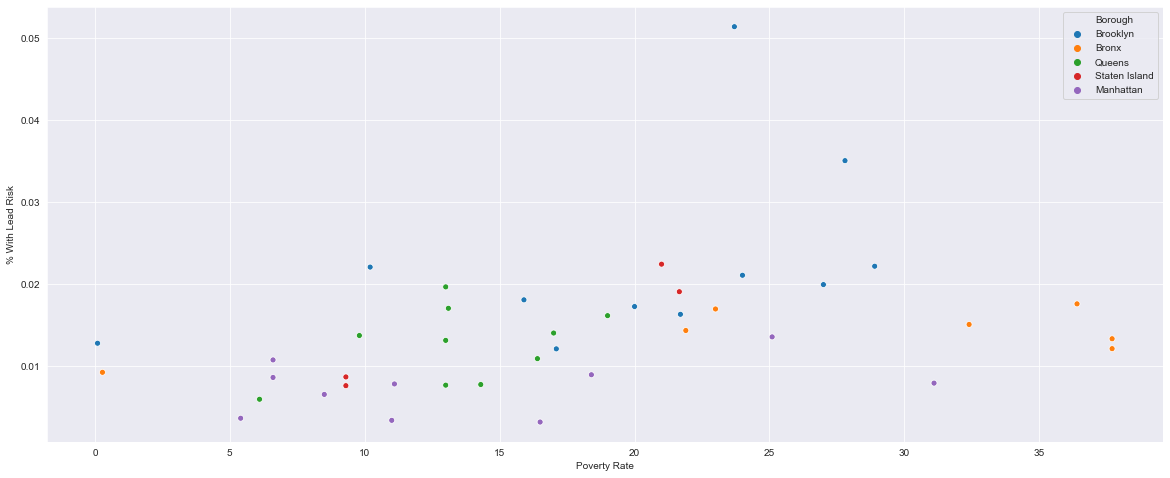

In [ ]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Poverty Rate", y="% With Lead Risk", hue="Borough")

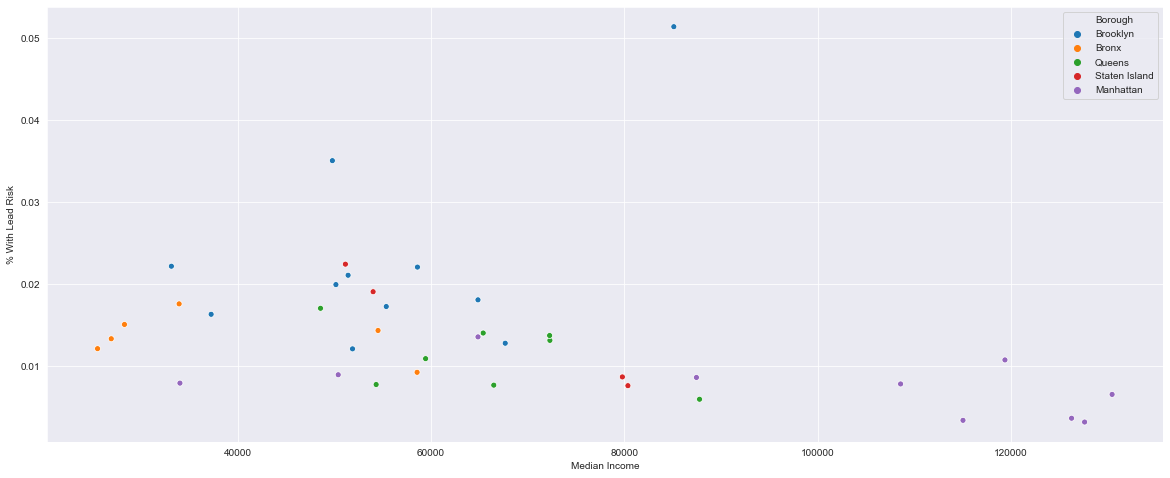

In [ ]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=df_povertyRate, x="Median Income", y="% With Lead Risk", hue="Borough")

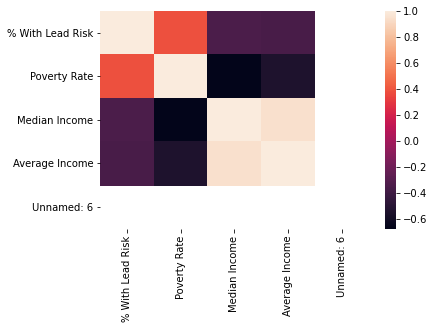

In [ ]:

sns.heatmap(df_povertyRate.corr())


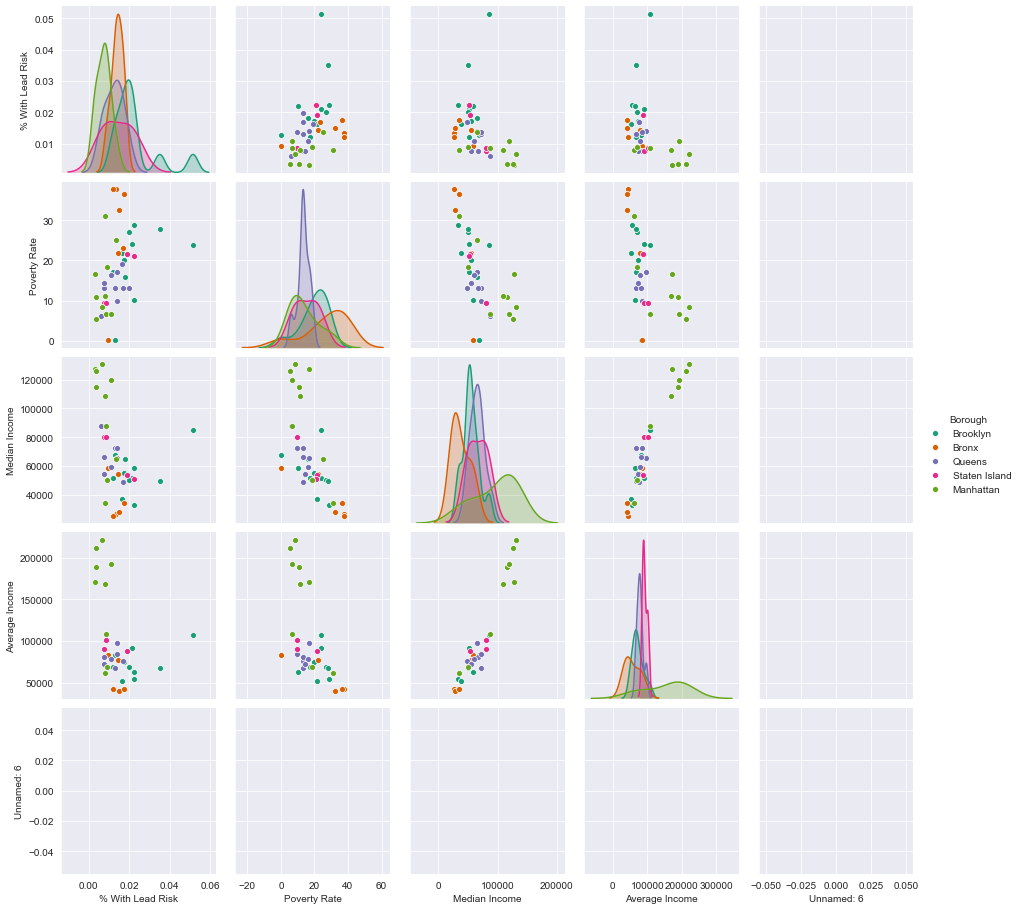

In [ ]:
sns.pairplot(df_povertyRate,hue='Borough',palette='Dark2')

In [ ]:
import geopandas as gpd
sns.set(style="darkgrid")

In [ ]:
nb = 'geo_export_7e724bd2-6b59-45bb-a9ce-4ccfcba60fb3.shp'
regions = gpd.read_file(nb)

In [ ]:
regions.sample(100)

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area,shape_leng,geometry
135,4.0,Queens,081,QN17,Forest Hills,5.782765e+07,36171.472649,"POLYGON ((-73.83103 40.71434, -73.83115 40.714..."
80,1.0,Manhattan,061,MN01,Marble Hill-Inwood,1.773269e+07,31844.409421,"MULTIPOLYGON (((-73.92152 40.85660, -73.92159 ..."
26,3.0,Brooklyn,047,BK91,East Flatbush-Farragut,3.436086e+07,39201.038379,"POLYGON ((-73.92574 40.64001, -73.92583 40.639..."
171,4.0,Queens,081,QN53,Woodhaven,3.703412e+07,28046.455432,"POLYGON ((-73.84914 40.69828, -73.84948 40.698..."
85,2.0,Bronx,005,BX43,Norwood,1.572493e+07,22150.308220,"POLYGON ((-73.88309 40.86660, -73.88363 40.867..."
...,...,...,...,...,...,...,...,...
193,5.0,Staten Island,085,SI36,Old Town-Dongan Hills-South Beach,6.701197e+07,41973.135765,"POLYGON ((-74.06503 40.58899, -74.06503 40.588..."
42,2.0,Bronx,005,BX62,Woodlawn-Wakefield,3.973879e+07,38694.040705,"POLYGON ((-73.83738 40.89392, -73.83646 40.891..."
104,1.0,Manhattan,061,MN04,Hamilton Heights,1.609614e+07,17411.381931,"POLYGON ((-73.94035 40.83046, -73.94014 40.830..."
162,3.0,Brooklyn,047,BK99,park-cemetery-etc-Brooklyn,2.253394e+08,385534.318657,"MULTIPOLYGON (((-73.91513 40.58627, -73.91510 ..."


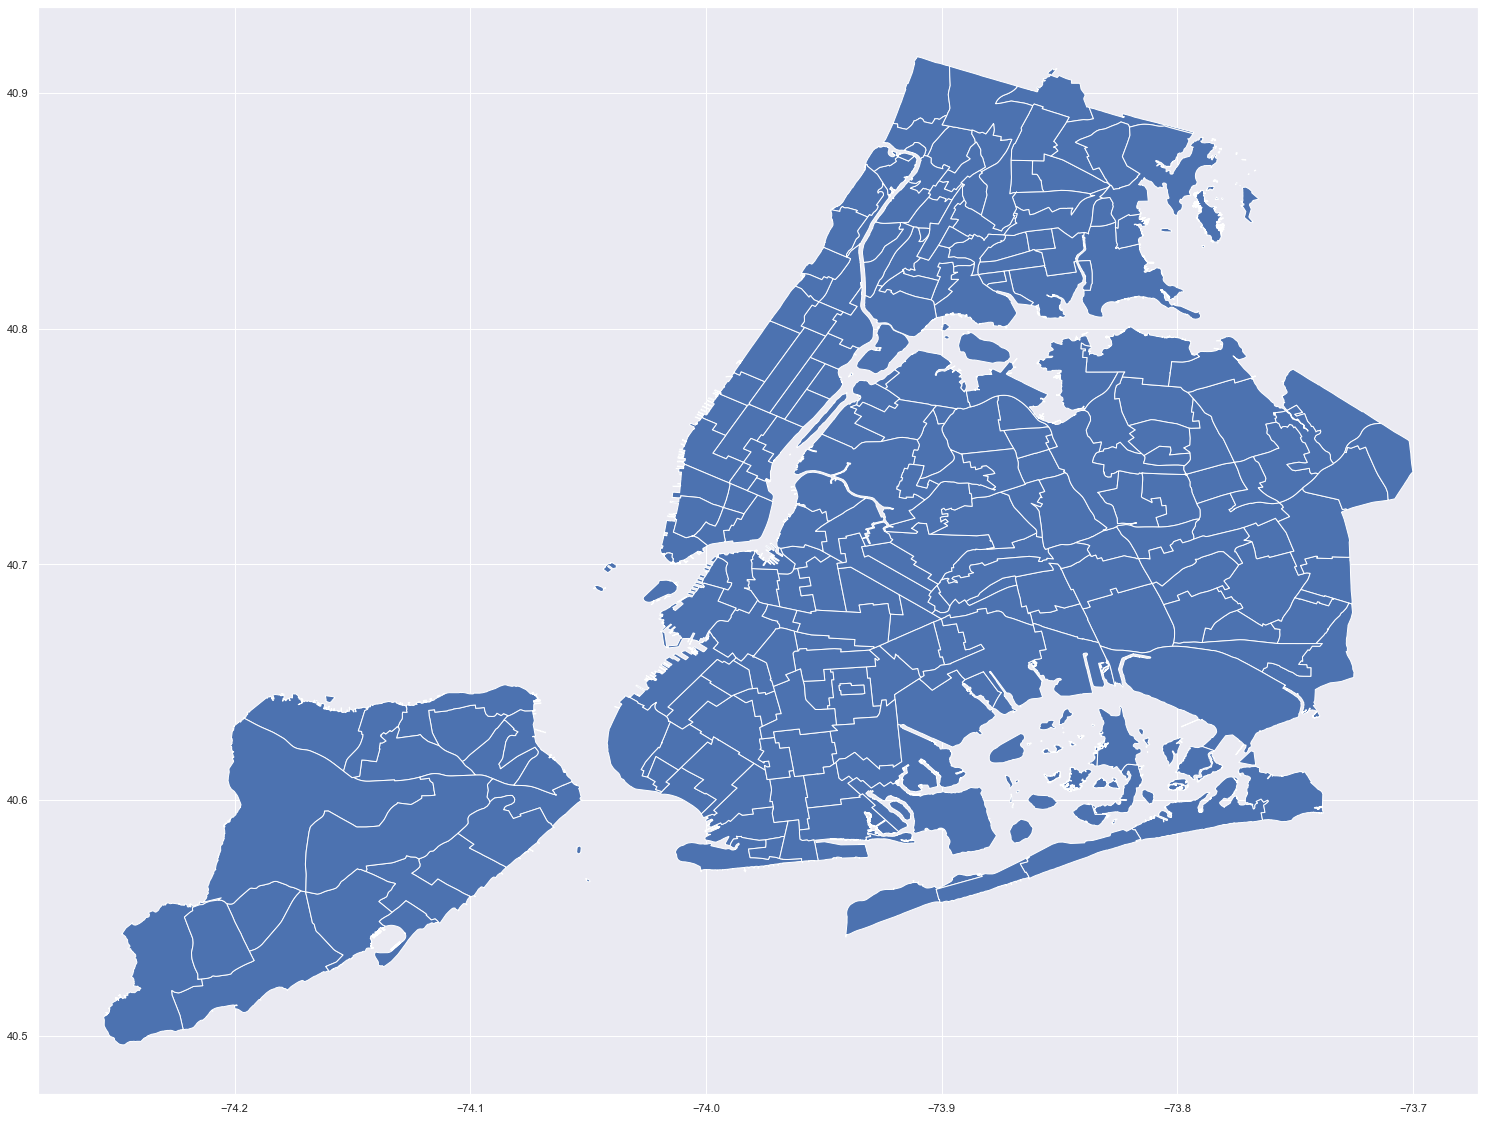

In [ ]:
regions.plot(figsize=(40,20))
plt.show()

In [ ]:
dab = pd.read_csv("data.csv")

In [ ]:
dab.head(10)

,ntaname,Unnamed: 1
0,Borough Park,0.035061
1,Murray Hill,0.007708
2,East Elmhurst,NaN
3,Erasmus,NaN
4,Hollis,NaN
5,Homecrest,NaN
6,Fresh Meadows-Utopia,0.007632
7,Longwood,NaN
8,Midwood,NaN
9,St. Albans,0.013103


In [ ]:
merged = regions.set_index('ntaname').join(dab.set_index('ntaname'))
merged = merged.reset_index()
merged[['ntaname', 'shape_area', 'shape_leng', 'geometry', 'Unnamed: 1']].sample(5)

,ntaname,shape_area,shape_leng,geometry,Unnamed: 1
190,Elmhurst,3.267524e+07,36711.312417,"POLYGON ((-73.86791 40.74493, -73.86788 40.744...",NaN
9,St. Albans,7.741275e+07,45401.317004,"POLYGON ((-73.75205 40.70523, -73.75174 40.704...",0.013103
116,Springfield Gardens North,2.843265e+07,25437.061861,"POLYGON ((-73.76031 40.67511, -73.75880 40.673...",0.013103
31,Fort Greene,1.648282e+07,19825.521059,"POLYGON ((-73.96939 40.69608, -73.96938 40.695...",NaN
85,Norwood,1.572493e+07,22150.308220,"POLYGON ((-73.88309 40.86660, -73.88363 40.867...",NaN


In [ ]:
merged['Unnamed: 1'] = merged['Unnamed: 1'].fillna(0)

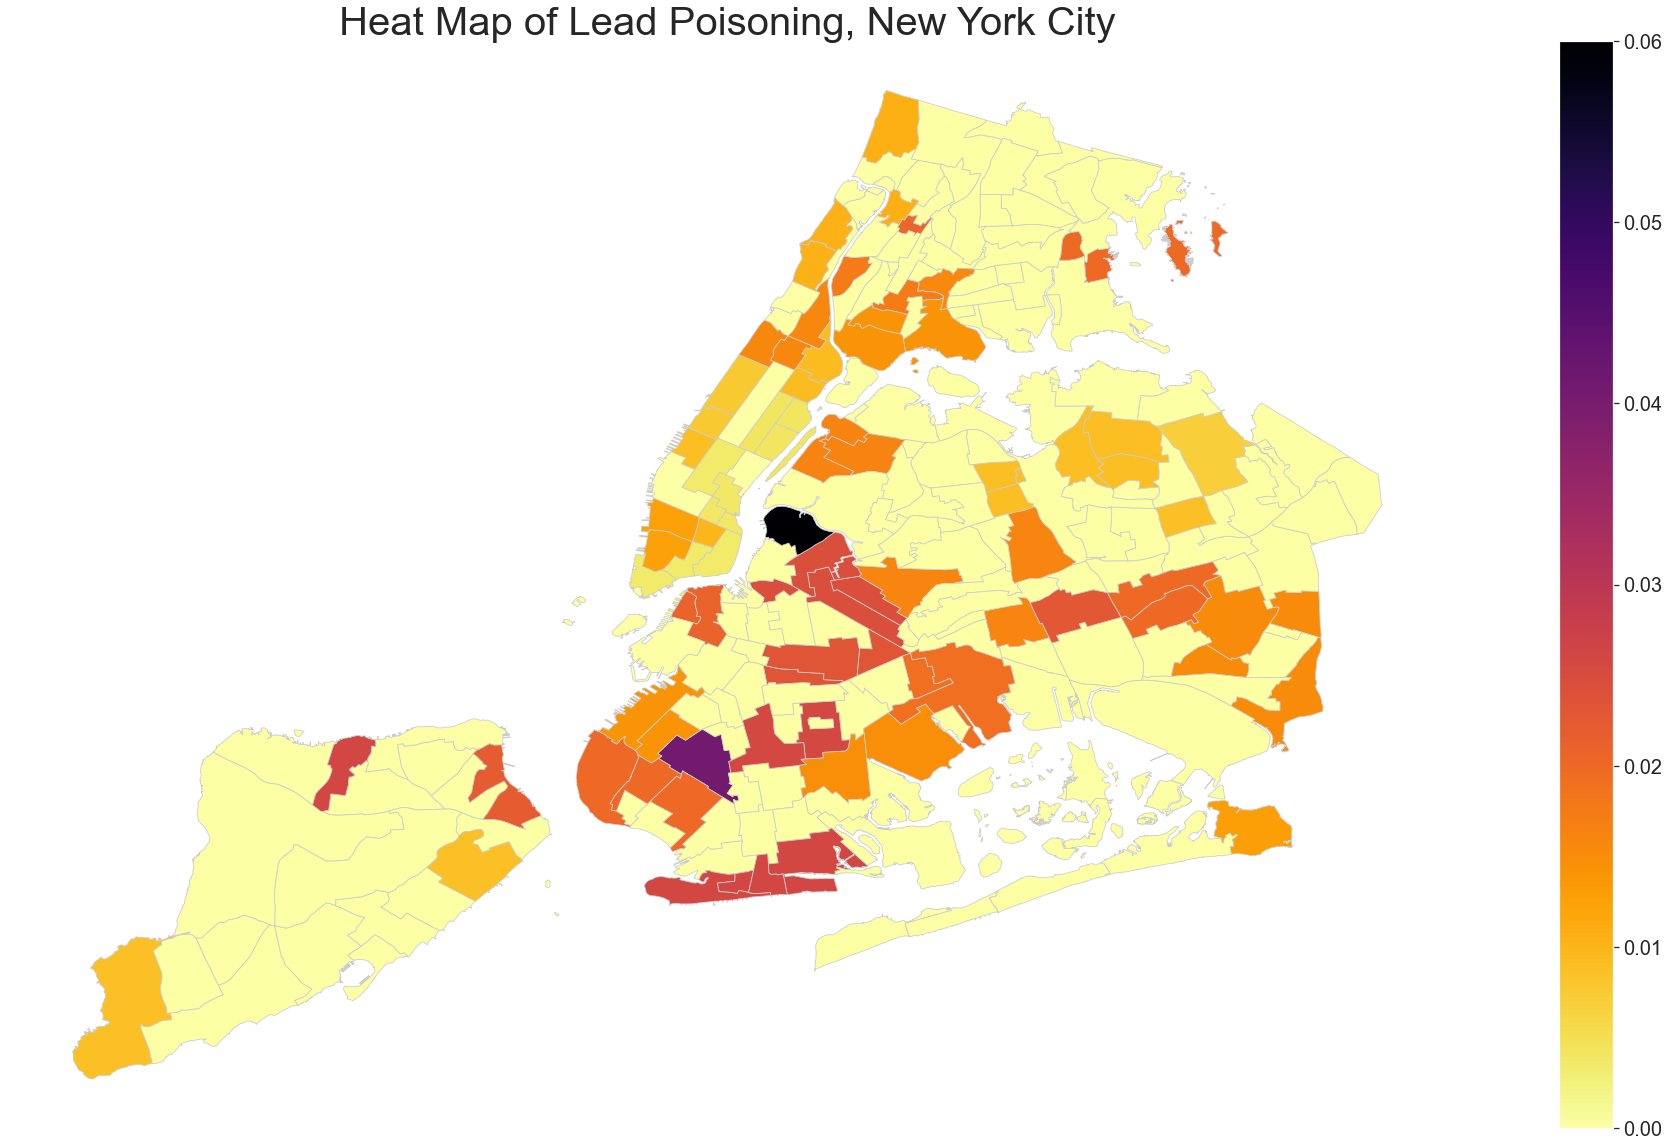

In [ ]:
fig, ax = plt.subplots(1, figsize=(40, 20))
ax.axis('off')
ax.set_title('Heat Map of Lead Poisoning, New York City', fontdict={'fontsize': '40', 'fontweight' : '3'})

color = 'inferno_r'
vmin, vmax = 0, 0.06
sm = plt.cm.ScalarMappable(cmap=color, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.ax.tick_params(labelsize=20)

merged.plot('Unnamed: 1', cmap=color, linewidth=0.8, ax=ax, edgecolor='0.8', figsize=(40,20))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6762a019-b4a3-4774-b79c-148850e2281e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>